# Quantifying speedup from full model to linear particle model
Tim Tyree<br>
9.19.2022

In [2]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt

import skimage as sk
from skimage import measure, filters

from numba import njit, jit, vectorize
from PIL import Image
import imageio
# import cv2 as cv

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
# width = 512
# height = 512
# channel_no = 3

# #load the libraries
from lib import *
# from lib.measure._find_tips_pbc_cy import lookup_segments
# from lib.measure._find_tips_kernel import *
# from lib.measure._find_tips_kernel_cy import find_intersections
#use cuda via numba
from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
from numba.typed import List
# from lib.contours_to_tips import *
import shutil
from lib.measure.comp_tips_safely import get_comp_tips
from lib.viewer.DomainPlot import SaveTipsAndColoredContours

%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


/Users/timothytyree/opt/miniconda3/envs/pyenv/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# DONE: make a movie of the LR model

In [3]:
def save_system_as_png(img,dimgdt,x_values,y_values,c_values,V_threshold,
            frameno,t,
            save_folder,
            save_fn):
    #visually verify system
    # compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
    # dict_out=compute_all_spiral_tips(t,img,dimgdt,level1=V_threshold,level2=0.)#,width=width,height=height)
    # print(f"{ntips} tips are present at time t={int(t_prev)}.")
    fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,
                     fontsize=16,vmin_img=-85.,vmax_img=35.,area=25,
                     frameno=frameno,
                     save_fn=save_fn,
                     save_folder=save_folder,
                     save=True,
                     annotating=True,
                     axis=[0,img.shape[0],0,img.shape[1]],cmap='bone')
    return save_fn

In [4]:
#initialize file system for movie storing
# min_time_between_samples = 2 #milliseconds
# frameno = 1
# dt=0.01
# save_every_n_frames = int(min_time_between_samples/dt)
dump_cache=True

os.chdir(nb_dir)
save_folder = os.path.join(nb_dir,f'Figures/mov')#c_{"test"}_V_{V_threshold}')
# save_folder_name = f'frame_every_{min_time_between_samples}_ms'
# save_folder = os.path.join(base_folder,save_folder_name)


#dump save_folder if it already exists
if os.path.exists(save_folder) and dump_cache:
    shutil.rmtree(save_folder)
    print(f"dumped cache at {save_folder}")

#create a save_folder if it doesn't already exist
# if not os.path.exists(base_folder):
#     os.mkdir(base_folder)
#     print(f"created save folder at {base_folder}")
# os.chdir(base_folder)
if not os.path.exists(save_folder):
    os.mkdir(save_folder)
    print(f"created save folder at {save_folder}")
os.chdir(save_folder)

dumped cache at /Users/timothytyree/Documents/GitHub/care/notebooks/Figures/mov
created save folder at /Users/timothytyree/Documents/GitHub/care/notebooks/Figures/mov


In [7]:
#one step from full 
save_folder=f'{nb_dir}/Figures/mov'
# ic_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-out/ic008.33.npz"
ic_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-in/ic008.33.npz"
t=0

txt=load_buffer(ic_fn)
ds=5.
frameno=1
# txt=load_buffer(txt_fn)
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
width,height=txt.shape[:2]
V_threshold=-40
dt=0.1 #supports really long termination time...
diffCoef=0.001#0.0005
Cm=1.0
# comp_dict_topo_full_color=get_comp_dict_topo_full_color(width=width,height=height,level1=V_threshold,level2=V_threshold)
# get_one_step at this dt
__, arr39, one_step = get_one_step_explicit_synchronous_splitting(
    nb_dir,dt=dt,width=width,height=height,ds=ds,diffCoef=diffCoef,Cm=Cm)
# comp_dict_topo_simple=get_comp_dict_topo_simple(width=width,height=height,level1=V_threshold,level2=0)


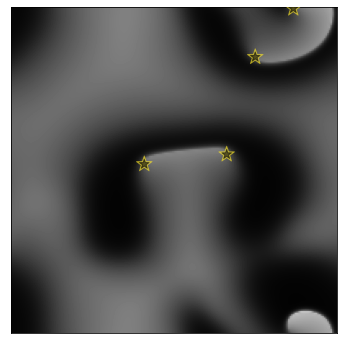

-n s=0, time=408.1 ms.
-n 
-n 
-n 
-n 
ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with Apple clang version 12.0.0 (clang-1200.0.32.28)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/4.3.1_9 --enable-shared --enable-pthreads --enable-version3 --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librtmp --enable-libspeex --enable-libsoxr --enable-videotoolbox --enable-libzmq --enable

[aac @ 0x7f946900d000] Qavg: 120.000
ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with Apple clang version 12.0.0 (clang-1200.0.32.28)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/4.3.1_9 --enable-shared --enable-pthreads --enable-version3 --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librtmp --enable-libspeex --enable-libsoxr --enable-videotoolbox --enable-libzmq --enable-libzim

frame=  961 fps=273 q=-1.0 Lsize=     451kB time=00:00:15.96 bitrate= 231.3kbits/s dup=1 drop=0 speed=4.54x    
video:434kB audio:1kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 3.713515%
[libx264 @ 0x7fb82981ca00] frame I:4     Avg QP:25.18  size:  3386
[libx264 @ 0x7fb82981ca00] frame P:298   Avg QP:28.11  size:  1034
[libx264 @ 0x7fb82981ca00] frame B:659   Avg QP:25.32  size:   185
[libx264 @ 0x7fb82981ca00] consecutive B-frames:  4.2% 10.0%  9.7% 76.2%
[libx264 @ 0x7fb82981ca00] mb I  I16..4: 54.4% 44.1%  1.5%
[libx264 @ 0x7fb82981ca00] mb P  I16..4:  3.9%  1.7%  0.0%  P16..4:  9.9%  0.6%  0.1%  0.0%  0.0%    skip:83.9%
[libx264 @ 0x7fb82981ca00] mb B  I16..4:  0.1%  0.0%  0.0%  B16..8:  4.8%  0.0%  0.0%  direct: 0.0%  skip:95.1%  L0:30.7% L1:69.0% BI: 0.3%
[libx264 @ 0x7fb82981ca00] 8x8 transform intra:32.2% inter:85.0%
[libx264 @ 0x7fb82981ca00] coded y,uvDC,uvAC intra: 2.8% 0.6% 0.3% inter: 0.2% 0.0% 0.0%
[libx264 @ 0x7fb82981ca00] i16 v,h,dc,p: 28% 18%  

0

In [8]:
#try to fix the wobble motion by increasing the time between img and img_prev
DT=4 #??
# DT=2 #supported odd numbers of spiral tips briefly
# DT=16 #tips far from apparent tips
#DT=8.#wobbeled
nsteps_per_DT=int(DT/dt)

#comp img_prev example
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
#integrate to t=100 milliseconds
while t<100:
    one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    t+=dt
img_prev=inVc[...,0].copy()
for n in range(nsteps_per_DT):
    one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    t+=dt
txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt).copy()
img=inVc[...,0].copy();#dimgdt=dVcdt[...,0]

jump_threshold=width/2
size_threshold=0
level1=V_threshold
level2=V_threshold
#compute spiral tip location and topological number
contours_a = find_contours(img,        level = level1)
contours_b = find_contours(img_prev,     level = level2)
s1_lst, s2_lst, x_lst, y_lst = contours_to_simple_tips_pbc(contours_a,contours_b,width,height,jump_threshold,size_threshold)

x_values=np.array(x_lst)
y_values=np.array(y_lst)
c_values=0*x_values

retval=ShowDomain(img,img_prev,x_values,y_values,c_values,V_threshold,t,inch=6,
                     fontsize=16,vmin_img=-85.,vmax_img=35.,area=25,
                     frameno=frameno,
                     save_fn=None,
                     save_folder=None,
                     save=False,
                     annotating=False,
                     axis=[0,img.shape[0],0,img.shape[1]], cmap='bone');

DT_fps=1#ms between frames
save_every_n_frames=int(DT_fps/dt)#20  #sets the overall frame rate
ntips=1
# while there are tips,
img_item_lst=[]
tfinal=9e9
tnaught=-9e9
while (ntips>0) or (t<tfinal):
    # =stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt).copy()
    #compute tips
    #     inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
    img=inVc[...,0].copy()#;dimgdt=dVcdt[...,0]
    img_item_lst.append((t,img))
    
    #recall img_prev, which is voltage at a time DT earlier
    t_a,img_prev=img_item_lst[0]
    DT_img_item_lst=t-t_a
    if DT_img_item_lst>=DT:
        img_item_lst.pop(0)

        #compute spiral tip location and topological number
        contours_a = find_contours(img,        level = level1)
        contours_b = find_contours(img_prev,     level = level2)
        s1_lst, s2_lst, x_lst, y_lst = contours_to_simple_tips_pbc(contours_a,contours_b,width,height,jump_threshold,size_threshold)
        ntips=len(x_lst)
        x_values=np.array(x_lst)
        y_values=np.array(y_lst)
        c_values=0.*x_values
        #t_prev=t;#txt_prev=txt.copy();
        frameno+=1
        
        #     save png
        if tnaught==-9e9:
            tnaught=t
        save_system_as_png(img,img_prev,x_values,y_values,c_values,V_threshold,
                frameno,t-tnaught,
                save_folder=save_folder,
                save_fn=None)
        print(f"ntips={ntips}, time={t:.1f} ms.", end='\r')

    for j in range(save_every_n_frames):
        #     integrate forward by one_step
        one_step(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)
        t+=dt
        
    if (ntips==0) and (tfinal==9e9):
        tfinal=t+100
beep(5)

#concatenate the folder of png files to a video
os.chdir(f"{nb_dir}/../vid/src")
!./concat_folder_png.sh

#rename that video reasonably
vidname='lr_'+os.path.basename(ic_fn)[:-4]+f'_DT_{DT}.mov'
os.chdir(f"{nb_dir}/../vid/mov")
os.rename('out.mov',vidname)
print(f"renamed video to {vidname}")

os.path.abspath(vidname)

beep(7)

# TODO: do a comparable task with the particle model

In [22]:
#return a scatter plot that may be saved as png
# annotating=True
# message='initial positions'
# fig=ScatterPlotSnapshot(x_values,y_values,t,width=L,height=L,
#                         annotating=annotating,message=message,inch=6)
# plt.show()

#DONE: dev function that returns a list of x coordinates and a list of y coordinates
#DONE: make a dict_out

# @njit
def format_particles(frameno,t,x_values,y_values,round_t_to_n_decimals=5):
    n_tips = x_values.shape[0]
    dict_out = {
        'frame':frameno,
        't': np.around(t,round_t_to_n_decimals),
        'n': n_tips,
        'x': x_values,
        'y': y_values}
    return dict_out



# #for snapshot output
# save_folder=f"{nb_dir}/Figures/mov"
# if os.path.exists(save_folder):
#     #cleanse the old snapshot folder
#     shutil.rmtree(save_folder)
# os.mkdir(save_folder)
    

In [26]:
# //utils for boundary conditions
# // Author: Tim Tyree
# // Date: 6.8.2021
# // Group: Rappel Group, UCSD
from numba import njit
@njit
def reflection(X, L):
    return L-abs(L-abs(X % 2.*L))
@njit
def periodic(X, L):
    x=X % L
    if (x<0.):
        return x+L
    return x


In [27]:
# frameno=1
# save_fn=None
# inch=6
# annotating=True

# # # message='without forces'
# # # force_code=0
# # # varkappa=0
# # message='with anti-spring forces'
# # force_code=1
# # varkappa=-5
# message='with inverse powerlaw forces'
# force_code=2
# varkappa=5

# from numba import jit,njit
# @njit
# def normalRandom():
#     return np.random.normal()

# @njit
# def uniformRandom():
#     return np.random.uniform(0,1)
# normalRandom(),uniformRandom()

# #define model parameters
# r=0.1
# D=2
# L=10
# kappa=1500
# # Dt=1e-5;dt=1e-5;tmax=500 #UNCOMMENT_HERE
# # Dt=1e-5;dt=1e-5;tmax=30 #COMMENT_HERE

# #for forces
# x0=5
# no_repulsion=1
# no_attraction=0
# seed=123456789
# #skipping reflect,set_second, and neighbor functionality

# #for csv output
# data_folder=f"{nb_dir}/data/local_results/collision_test"
# if not os.path.exists(data_folder):
#     os.mkdir()
# data_folder=data_folder+"/Log"
# data_fn=f"pbc_seed_{seed}_fc_{force_code}_r_{r}_D_{D}_L_{L}_kappa_{kappa}_varkappa_{varkappa}_log.csv"
    
    

# #define constants
# stepscale=np.sqrt(2*D*Dt)
# probreact=kappa*dt
# T_net=0;count_net=0
# np.random.seed(seed)
# dist_cutoff=1e-2
# iter_per_movestep = round(Dt/dt)
# impulse_prefactor= varkappa * Dt
# save_every=250#100
# step=0
# recording_locations=True
# recording_snapshots=False
# print("running simulation...");
# Time=0;t=0
# still_running=True;exit_code=-1;T=-9999.
# #initialize positions
# # #uniform random ic
# # x_values=rs.uniform(size=N)*L
# # y_values=rs.uniform(size=N)*L
# # #explicitely uniform ic
# # uvals=np.linspace(0,L,5)
# # x_values,y_values=np.meshgrid(uvals,uvals)
# # x_values=x_values.flatten()
# # y_values=y_values.flatten()

# #lower case: world coordinates
# #upper case: material coordinates
# x=x_values.copy()
# y=y_values.copy()
# x_old=x_values.copy()
# y_old=y_values.copy()
# x_new=x_values.copy()
# y_new=y_values.copy()
# X=x_values.copy()
# Y=y_values.copy()
# X_old=x_values.copy()
# Y_old=y_values.copy()
# X_new=x_values.copy()
# Y_new=y_values.copy()
# zeros=np.zeros_like(x_values)
# zerosint=np.zeros_like(x_values).astype('int')
# still_running=zerosint==zerosint

In [29]:
# //utils for periodic boundary conditions
# // Author: Tim Tyree
# // Date: 6.8.2021
# // Group: Rappel Group, UCSD
from numba import njit
import numpy as np
@njit
def pbc(x, L):
    if(x<0):
        X = x+L
        return X
    if(x>=L):
        X = x-L
        return X
    return x

@njit
def sqdiff(x1, x2):
    return pow((x1-x2),2)

@njit
def min3(num1, num2, num3):
    if (num1 > num2 ):
        mn=num2
    else:
        mn=num1
    if (mn>num3):
        mn=num3
    return mn

@njit
def min2(num1, num2):
    if (num1 > num2):
        mn=num2
    else:
        mn=num1
    return mn

@njit
def max2(num1, num2):
    if (num1 < num2):
        mn=num2
    else:
        mn=num1
    return mn

@njit
def dist_pbc(x1, y1, x2, y2, L):
    # returns the smallest dist of each possible pbc combination
    xsq1 = sqdiff(x1,x2)
    xsq2 = sqdiff(x1,x2+L)
    xsq3 = sqdiff(x1,x2-L)
    ysq1 = sqdiff(y1,y2)
    ysq2 = sqdiff(y1,y2+L)
    ysq3 = sqdiff(y1,y2-L)
    xsq  = min3(xsq1,xsq2,xsq3)
    ysq  = min3(ysq1,ysq2,ysq3)
    return np.sqrt(xsq+ysq)

@njit
def subtract_pbc_1d(x1, x2, L):
    # returns the smallest dist of each possible pbc combination
    dx = x1-x2
    dx1 = x1-x2+L
    dx2 = x1-x2-L
    if (abs(dx1)<abs(dx)):
        dx=dx1;
    else:
        if (abs(dx2)<abs(dx)):
            dx=dx2
    return dx


In [39]:
#heretim
#TODO: measure time scale of the runtime
dt=0.1 #ms #same as full
# tmax=10 #ms #same as full measurement
tmax=1000000 #ms #same as full measurement

from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
# seed=123456789#for original movie suite
seed=1
#random number stream A
rs = RandomState(MT19937(SeedSequence(seed)))
#random number stream B
# rs = RandomState(MT19937(SeedSequence(987654321)))

#get distance metric
distance_L2_pbc=get_distance_L2_pbc(width=1,height=1)
np.random.seed(seed)

# N=16
N=4  #same as full measurement
L=10
x_values=rs.uniform(size=N)*L
y_values=rs.uniform(size=N)*L
t=0

#define model parameters
r=0.1
D=2
L=10
kappa=1500
# Dt=1e-5;dt=1e-5;tmax=500 #UNCOMMENT_HERE
Dt=float(dt)
# Dt=1e-5;
# dt=1e-5;tmax=30 #COMMENT_HERE

#for forces
x0=5
no_repulsion=0
no_attraction=0
seed=123456789
#skipping reflect,set_second, and neighbor functionality

# #for csv output
# data_folder=f"{nb_dir}/data/local_results/collision_test"
# if not os.path.exists(data_folder):
#     os.mkdir(data_folder)
# data_folder=data_folder+"/Log"
# data_fn=f"pbc_seed_{seed}_fc_{force_code}_r_{r}_D_{D}_L_{L}_kappa_{kappa}_varkappa_{varkappa}_log.csv"
    
    

#define constants
stepscale=np.sqrt(2*D*Dt)
probreact=kappa*dt
T_net=0;count_net=0
np.random.seed(seed)
dist_cutoff=1e-2
iter_per_movestep = round(Dt/dt)
impulse_prefactor= varkappa * Dt
save_every=250#100
step=0
# recording_locations=True
# recording_locations=True
recording_snapshots=False
print("running simulation...");
Time=0;t=0
still_running=True;exit_code=-1;T=-9999.
#initialize positions
# #uniform random ic
# x_values=rs.uniform(size=N)*L
# y_values=rs.uniform(size=N)*L
# #explicitely uniform ic
# uvals=np.linspace(0,L,5)
# x_values,y_values=np.meshgrid(uvals,uvals)
# x_values=x_values.flatten()
# y_values=y_values.flatten()

#lower case: world coordinates
#upper case: material coordinates
x=x_values.copy()
y=y_values.copy()
x_old=x_values.copy()
y_old=y_values.copy()
x_new=x_values.copy()
y_new=y_values.copy()
X=x_values.copy()
Y=y_values.copy()
X_old=x_values.copy()
Y_old=y_values.copy()
X_new=x_values.copy()
Y_new=y_values.copy()
zeros=np.zeros_like(x_values)
zerosint=np.zeros_like(x_values).astype('int')
still_running=zerosint==zerosint


running simulation...


In [40]:
# //start set_second kernel
# //end set_second kernel
#TODO: make still_running into still_running_values
dict_out_lst=[]
while(still_running.any()):
    # //reinitialize_kernel, which copies X,Y_new to X,Y_old
    min_dist_old=zeros+9999999
    i_neighbor=zerosint-1
    X_old=X_new
    Y_old=Y_new
    # //enforce boundary conditions
    for i in range(N):
        x_old[i]=periodic(X_old[i],L);
        y_old[i]=periodic(Y_old[i],L);
    
    t=Time-dt;#//for an insignificant edge case
    Time=Time+Dt;
    
    # reset the net forces
    Fx_net=zeros.copy()
    Fy_net=zeros.copy()
    
    #sum_each_force_kernel
    for i in range(N):
        if(still_running[i]):
            for j in range(i+1,N-1):
                if(still_running[j]):
                    #compute displacement vector with pbc
                    dx = subtract_pbc_1d(x_old[j],x_old[i],L);
                    dy = subtract_pbc_1d(y_old[j],y_old[i],L);

                    dist2=dx*dx+dy*dy;
                    if (dist2<1e-8):
                        dist2=float(1e-8)
                    dist = np.sqrt(dist2)

                    #compute displacement due to drift
                    impulse_factor=0.
                    if (force_code==1):
                      #spring
                      impulse_factor=impulse_prefactor*(dist-x0)/dist;
                    if (force_code==2):
                      #QED2: force ~ inverse power law
                      impulse_factor=impulse_prefactor/dist2;
                    if (force_code==3):
                      #QED3: force ~ inverse square power law
                      impulse_factor=impulse_prefactor/dist2/dist;

                    #set impulse_factor to zero if it is explicitly forbidden by the user input
                    if ((no_attraction==1) & (impulse_factor>0)):
                        impulse_factor=0.
                    if ((no_repulsion==1) & (impulse_factor<0)):
                        impulse_factor=0.

                    #sum Fx_net, Fy_net according to a symplectic (momentum conserving) integrator
                    Fx_net[i]=Fx_net[i]+dx*impulse_factor;
                    Fy_net[i]=Fy_net[i]+dy*impulse_factor;
                    Fx_net[j]=Fx_net[j]-dx*impulse_factor;
                    Fy_net[j]=Fy_net[j]-dy*impulse_factor

    #compute the one_step given the net force, F_net        
    for i in range(N):
        if(still_running[i]):
            dxt=Fx_net[i];
            dyt=Fy_net[i];
            # compute displacement due to gaussian white noise
            dxW=stepscale*normalRandom();
            dyW=stepscale*normalRandom();
            # next spatial position, time integrating by a duration, Dt.
            X_new[i]=X_old[i]+dxW+dxt;
            Y_new[i]=Y_old[i]+dyW+dyt;
            # enforce PBC
            x_new[i]=periodic(X_new[i],L);
            y_new[i]=periodic(Y_new[i],L);        

            
    #interpolation_kernel at short timescale, dt   
    for s in range(iter_per_movestep):
        # compute local time
        t=t+dt;
        frac=(Time-t)/Dt;
        cfrac=1.-frac;
        # kernel_interpolate, which enforces b.c.'s
        for i in range(N):
            if(still_running[i]):
                # linear interpolation
                X[i]=frac*X_old[i]+cfrac*X_new[i];
                Y[i]=frac*Y_old[i]+cfrac*Y_new[i];
                # impose boundary conditions
                # enforce PBC
                x[i]=periodic(X[i],L);
                y[i]=periodic(Y[i],L);

    #reaction_kernel
    for i in range(N):
        if(still_running[i]):
            # // each i,j pair is reached once per call to kernel_measure
            for j in range(i+1,N-1):
                if(still_running[j]):
                    # // compute distance between particles that are still running
                    dist=dist_pbc(x[i],y[i],x[j],y[j],L);
                    in_range=dist<r;
                    # // in_range=true;//uncomment for smeared method
                    # // if two particles are in range
                    if(in_range):
                        # // determine whether those two particles react via the simple method
                        reacts=probreact>uniformRandom();
                        # // determine whether those two particles react via the smeared method
                        # // sig=sigmoid(dist, r, beta);
                        # // reacts=probreact*sig>uniformRandom();
                        if(reacts):
                            T=t;
                            still_running[i]=False;
                            still_running[j]=False;
                            exit_code=1;
             
    if step%save_every==0:
        x_plot=x_new[still_running]
        y_plot=y_new[still_running]
#         if recording_snapshots:
#             #save result as png
#             SaveScatterPlotSnapshot(x_plot,y_plot,t,width=L,height=L,
#                             frameno=frameno,save_folder=save_folder,
#                             annotating=annotating,message=message)
#         if (recording_locations)&(x_plot.shape[0]>0):
#             #append particle locations to log, dict_out_lst
#             dict_out=format_particles(frameno,t,x_plot,y_plot)
#             dict_out_lst.append(dict_out)
    
        frameno+=1

    #shut simulation down if it's taking too long...
    if (t>tmax):
        for i in range(N):
            still_running[i]=False;
            exit_code=-99;
    
    step+=1
    #end while running
    
#record this trial
if (exit_code>0):
    if (T>0.):
        T_net=T_net+T;
        count_net=count_net+1;
    
print(f"simulation complete!")

#TODO: njit the whole function



simulation complete!


In [ ]:
# #save particle locations as csv
# saving=recording_locations
# printing=True
# if saving:
#     df = pd.concat([pd.DataFrame(dict_out) for dict_out in dict_out_lst])
#     df.reset_index(inplace=True, drop=True)
#     #save the recorded data
#     os.chdir(data_folder)
#     df.to_csv(data_fn, index=False)
#     if printing:
#         print('saved to:')
#         print(os.path.abspath(data_fn))
#     #     #if the end of AF was indeed reachded, append a row recording this
#     #     if n_tips==0:
#     #         next_id = df.index.values[-1]+1
#     #         df = pd.concat([df,pd.DataFrame({'t': float(save_every_n_frames*h+t),'n': int(n_tips)}, index = [next_id])])
#     #save the recorded data
# #     #     df.round(round_output_decimals).to_csv(data_dir_log, index=False)
# #     if printing:
# #         print('saved to:')
# #         print(data_dir_log)

# TODO: remove plotting and time both for a sufficiently large number of time steps